# Exercici 2.8. Anàlisi d’un servei de bike-sharing

Descripció dels fitxers (esquema)

trips.csv

trip_id (int)

start_station_id (int)

end_station_id (int)

user_id (int)

start_time (YYYY-MM-DD HH:MM:SS)

end_time (YYYY-MM-DD HH:MM:SS)

duration_min (float) — durada en minuts

stations.csv

station_id (int)

station_name (str)

city (str)

capacity (int)

users_bike.csv

user_id (int)

signup_date (YYYY-MM-DD)

user_type (str) — subscriber o casual

age (int)

gender (str)

Importar llibreries i llegir els CSV. Mostrar head() de cada DataFrame.

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

stations = pd.read_csv("./data/stations.csv")
print(stations.head())
trips = pd.read_csv("./data/trips.csv")
print(trips.head())
users_bike = pd.read_csv("./data/users_bike.csv")
print(users_bike.head())

   station_id station_name       city  capacity
0           1    Station 1  Barcelona        47
1           2    Station 2     Madrid        26
2           3    Station 3  Barcelona        44
3           4    Station 4  Barcelona        30
4           5    Station 5   Valencia        36
   trip_id  user_id  start_station_id  end_station_id           start_time  \
0        1     1206                24              22  2023-01-22 08:32:00   
1        2     1035                28              40  2023-09-07 10:31:00   
2        3     1032                12              47  2023-12-08 04:15:00   
3        4     1424                13              16  2023-08-29 23:34:00   
4        5     1433                 2              23  2023-11-11 07:37:00   

              end_time  duration_min  
0  2023-01-22 09:11:06         39.11  
1  2023-09-07 10:37:55          6.93  
2  2023-12-08 04:47:06         32.11  
3  2023-08-29 23:34:32          0.55  
4  2023-11-11 07:40:28          3.47  
   user_i

Unir dades en trips_df (trips + stations (start station) + users).

In [71]:
trips_df = pd.merge(trips, stations, left_on='start_station_id', right_on='station_id', suffixes=('_trip', '_start'))
trips_df = pd.merge(trips_df, stations, left_on='end_station_id', right_on='station_id', suffixes=('', '_end'))
trips_df = pd.merge(trips_df, users_bike, left_on='user_id', right_on='user_id')
print(trips_df.head())

   trip_id  user_id  start_station_id  end_station_id           start_time  \
0        1     1206                24              22  2023-01-22 08:32:00   
1        2     1035                28              40  2023-09-07 10:31:00   
2        3     1032                12              47  2023-12-08 04:15:00   
3        4     1424                13              16  2023-08-29 23:34:00   
4        5     1433                 2              23  2023-11-11 07:37:00   

              end_time  duration_min  station_id station_name       city  \
0  2023-01-22 09:11:06         39.11          24   Station 24   Valencia   
1  2023-09-07 10:37:55          6.93          28   Station 28    Sevilla   
2  2023-12-08 04:47:06         32.11          12   Station 12  Barcelona   
3  2023-08-29 23:34:32          0.55          13   Station 13    Sevilla   
4  2023-11-11 07:40:28          3.47           2    Station 2     Madrid   

   capacity  station_id_end station_name_end   city_end  capacity_end  \
0

Comprovar shape i info().

In [72]:
trips_df.shape
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trip_id           2000 non-null   int64  
 1   user_id           2000 non-null   int64  
 2   start_station_id  2000 non-null   int64  
 3   end_station_id    2000 non-null   int64  
 4   start_time        2000 non-null   object 
 5   end_time          2000 non-null   object 
 6   duration_min      2000 non-null   float64
 7   station_id        2000 non-null   int64  
 8   station_name      2000 non-null   object 
 9   city              2000 non-null   object 
 10  capacity          2000 non-null   int64  
 11  station_id_end    2000 non-null   int64  
 12  station_name_end  2000 non-null   object 
 13  city_end          2000 non-null   object 
 14  capacity_end      2000 non-null   int64  
 15  signup_date       2000 non-null   object 
 16  user_type         2000 non-null   object 


Calcular la durada mitjana per user_type i per city.

In [73]:
# media por user type y por city
# la columna correcta es 'duration_min' i volem agrupar també per 'city'
media_user_type = trips_df.groupby(['user_type'])['duration_min'].mean().reset_index(name='mean_duration_min')
print("Media de durada per tipus d'usuari:")
print(media_user_type)
media_city = trips_df.groupby(['city'])['duration_min'].mean().reset_index(name='mean_duration_min')
print('')
print("Media de durada per ciutat:")
print(media_city)

Media de durada per tipus d'usuari:
    user_type  mean_duration_min
0      casual          19.726125
1  subscriber          20.624549

Media de durada per ciutat:
        city  mean_duration_min
0  Barcelona          19.853686
1     Madrid          21.246331
2    Sevilla          19.768690
3   Valencia          20.633246


Visualització 1: histograma de duration_min.

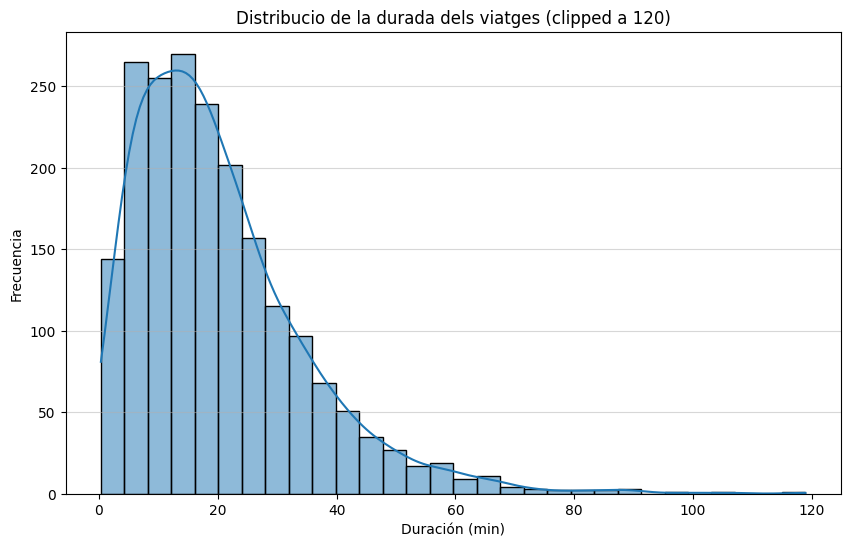

In [74]:
# Histograma de duration_min
plt.figure(figsize=(10,6))
sns.histplot(trips_df['duration_min'], bins=30, kde=True, color='C0')
plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')
plt.title('Distribucio de la durada dels viatges (clipped a 120)')
plt.grid(axis='y', alpha=0.5)
plt.show()

Visualització 2: barplot de viatges per estació (top 10).

C:\Users\alanr\AppData\Local\Temp\ipykernel_13188\661498795.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stations.values, y=top_stations.index, palette='magma')


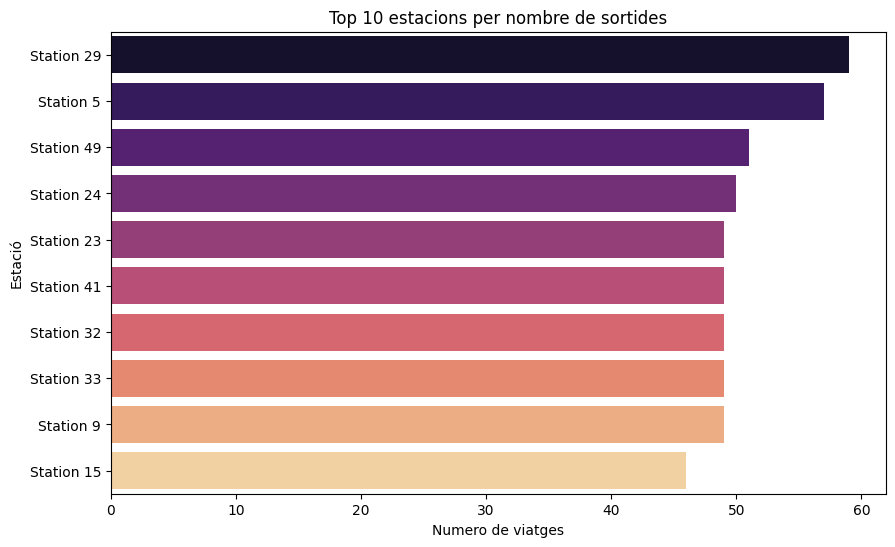

In [75]:
# Barplot de les 10 estacions amb més sortides
top_stations = trips_df['station_name'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_stations.values, y=top_stations.index, palette='magma')
plt.xlabel('Numero de viatges')
plt.ylabel('Estació')
plt.title('Top 10 estacions per nombre de sortides')
plt.show()

Visualització 3: evolució diària del nombre de viatges (time series).

Text(0.5, 1.0, 'viatges diaris')

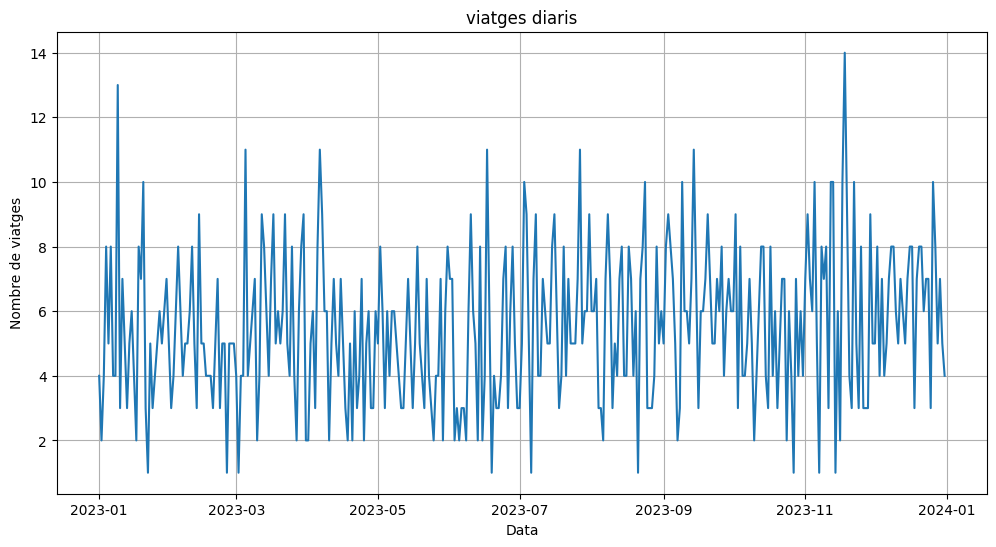

In [76]:
#evolucion diaria del numero de viajes
trips_df['start_time'] = pd.to_datetime(trips_df['start_time'])
trips_df['date'] = trips_df['start_time'].dt.date
daily_trips = trips_df.groupby('date').size().reset_index(name='num_trips')
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_trips, x='date', y='num_trips')
plt.xlabel('Data')
plt.ylabel('Nombre de viatges')
plt.grid()
plt.title('viatges diaris')

Visualització 4: boxplot de durada per user_type.

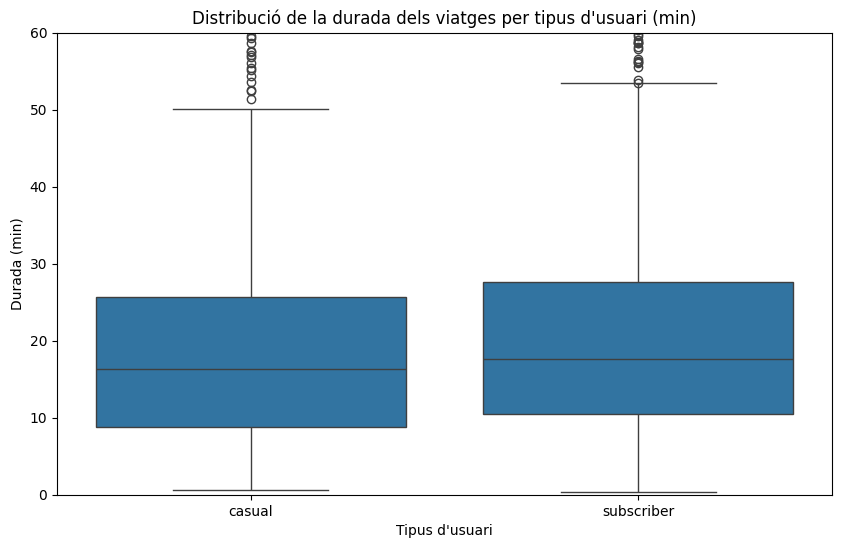

In [77]:
# boxplot de la durada dels viatges per tipus d'usuari
plt.figure(figsize=(10,6))
# use the existing 'duration_min' column (no 'duration_sec' in the dataframe)
sns.boxplot(data=trips_df, x='user_type', y='duration_min', color='C0')
plt.xlabel("Tipus d'usuari")
plt.ylabel('Durada (min)')
plt.ylim(0,60)  # Limitar l'eix Y per millor visualització
plt.title("Distribució de la durada dels viatges per tipus d'usuari (min)")
plt.show()

Correlació entre capacitat d’estació i nombre de sortides.

Correlacion: -0.036


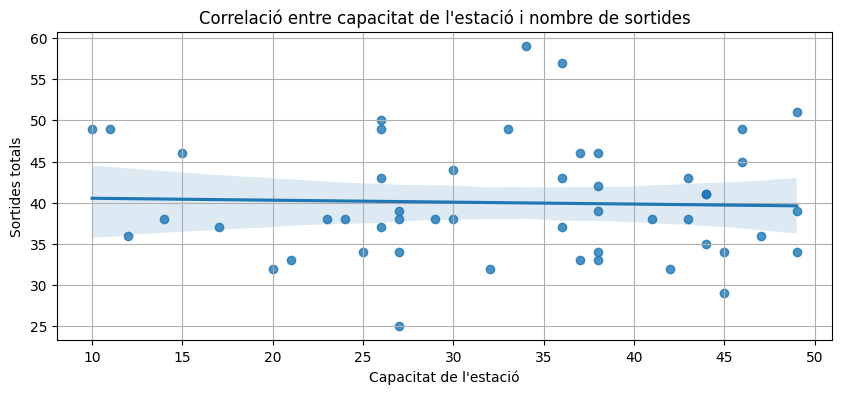

In [82]:
# correlacion entre capacidad de la estacion y numero de viajes iniciados
station_capacity = trips_df.groupby('station_name')['capacity'].first().reset_index()
trip_counts = trips_df['station_name'].value_counts().reset_index()
trip_counts.columns = ['station_name', 'num_trips']
correlation_df = pd.merge(station_capacity, trip_counts, on='station_name')

# Asegurar que las columnas usadas son numéricas y no contienen strings
correlation_df['capacity'] = pd.to_numeric(correlation_df['capacity'], errors='coerce')
correlation_df['num_trips'] = pd.to_numeric(correlation_df['num_trips'], errors='coerce')
correlation_df = correlation_df.dropna(subset=['capacity', 'num_trips'])

plt.figure(figsize=(10,4))
# pasar arrays numéricos explícitos evita que se intente convertir los nombres de estación
sns.regplot(x=correlation_df['capacity'].astype(float), y=correlation_df['num_trips'].astype(float))
plt.xlabel("Capacitat de l'estació")
plt.ylabel('Sortides totals')
plt.title("Correlació entre capacitat de l'estació i nombre de sortides")
plt.grid(True)

# Mostrar la correlació numèrica
corr = correlation_df[['capacity', 'num_trips']].corr().iloc[0, 1]
print(f"Correlacion: {corr:.3f}")

plt.show()